Copyright 2020 Vasile Rus, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Logistic Regression

So far, we have looked at two broad kinds of supervised learning, classification and regression.
Classification predicts a class label for an observation (i.e., a row of the dataframe) and regression predicts a numeric value for an observation.

Logistic regression is a kind of regression that is primarily used for classification, particularly binary classification.
It does this by predicting the **probability** (technically the log-odds) of the positive class assigned label `1`.
If the probability is above a threshold, e.g .50, then this predicted numeric value is interpreted as a classification of `1`.
Otherwise, the predicted numeric value is interpreted as a classification of `0`.
So **logistic regression predicts a numeric probability that we convert into a classification.**

Logistic regression is widely used in data science classification tasks, for example to:

* categorize a person as having diabetes or not having diabetes
* categorize an incoming email as spam or not spam

Because logistic regression is also regression, it captures the relationship between an outcome/dependent variable and the predictor/independent variables in a similar way to linear regression.
The major difference is that the coefficients in logistic regression can be interpreted probabilistically, so that we can say how much more likely a predictor variable makes a positive classification.

The most common kind of logistic regression is binary logistic regression, but it is possible to have:

* Binary/binomial logistic regression
* Multiclass/Multinomial logistic regression
* Ordinal logistic regression (there is an order among the categories)

<!-- NOTE: I think this has been covered already, except maybe the hard/soft distinction -->
<!-- **What is classification?**

A classification/categorization task is about placing an object, e.g., a patient, into one of many categories, e.g. diseases, based on some characteristics of that object, e.g, patient’s symptoms.

Depending on the number of classes/categories, classification tasks are called:
* Binary/binomial vs. multi-class/multinomial classification. The simplest form of classification is binary classification, e.g., spam vs. not-spam email.
* Multinomial classification. An example is categorizing birds into one of many species.

**Hard classification vs. soft classification**
* Hard classification: The object is placed into one and only one category out of many
* Soft classification: the object is assigned to more than one category with some measure indicating the confidence of that object belonging to those categories

In this notebook, we focus on binary, hard classification tasks. -->

## What you will learn

In the sections that follow you will learn about logistic regression, an extension of linear regression, and how it can be used for classification.  
We will study the following:

- The math behind logistic regression
- Interpreting logistic regression coefficients
- Evaluating classification performance

## When to use logistic regression

Logistic regression works best when you need a classifier and want to be able to interpret the predictor variables easily, as you can with linear regression. 
Because logistic regression is fundamentally regression, it has the some assumptions of linearity and additivity, which may not be appropriate for some problems. 
Binary logistic regression is widely used and scales well, but multinomial variants typically begin to have performance problems when the number of classes is large.

## Mathematical Foundations of Logistic Regression for Binary Classification

We briefly review in this section the mathematical formulation of logistic regression for binary classification problems. 
That is, the predicted categories are just two (say, 1 or 0) and each object or instance belongs to one and only one category. 

Logistic regression expresses the relationship between the output variable, also called dependent variable, and the predictors, also called independent variables or features, in a similar way to linear regression with an additional twist. 
The additional twist is necessary in order to transform the typical continuous value of linear regression onto a categorical value (0 or 1).

**From Linear Regression to Logistic Regression**

Let us review first the basics of linear regression and then discuss how to transform the mathematical formulation of linear regression such that the outcome is categorical. 

In a typical linear regression equation, the output variable $Y$ is related to $n$ predictor variables $X_j$ ($j=1,n$) using the following linear relation, where the output $Y$ is a linear combination of the predictors $X_j$ with corresponding weights (or coefficients) $\beta_{j}$:

$$Y = {\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}{\beta}_{j}$$

In linear regression, the output $Y$ has continuous values between $-\inf$ and $+\inf$. In order to map such output values to just 0 and 1, we need to apply the sigmoid or logistic function.

$$\sigma (t) = \frac{1}{1 + e^{-t}}$$

A graphical representation of the sigmoid or logistic function is shown below (from Wikipedia). 
The important part is that the output values are in the interval $(0,1)$ which is close to our goal of just predicted values 1 or 0.

<!-- 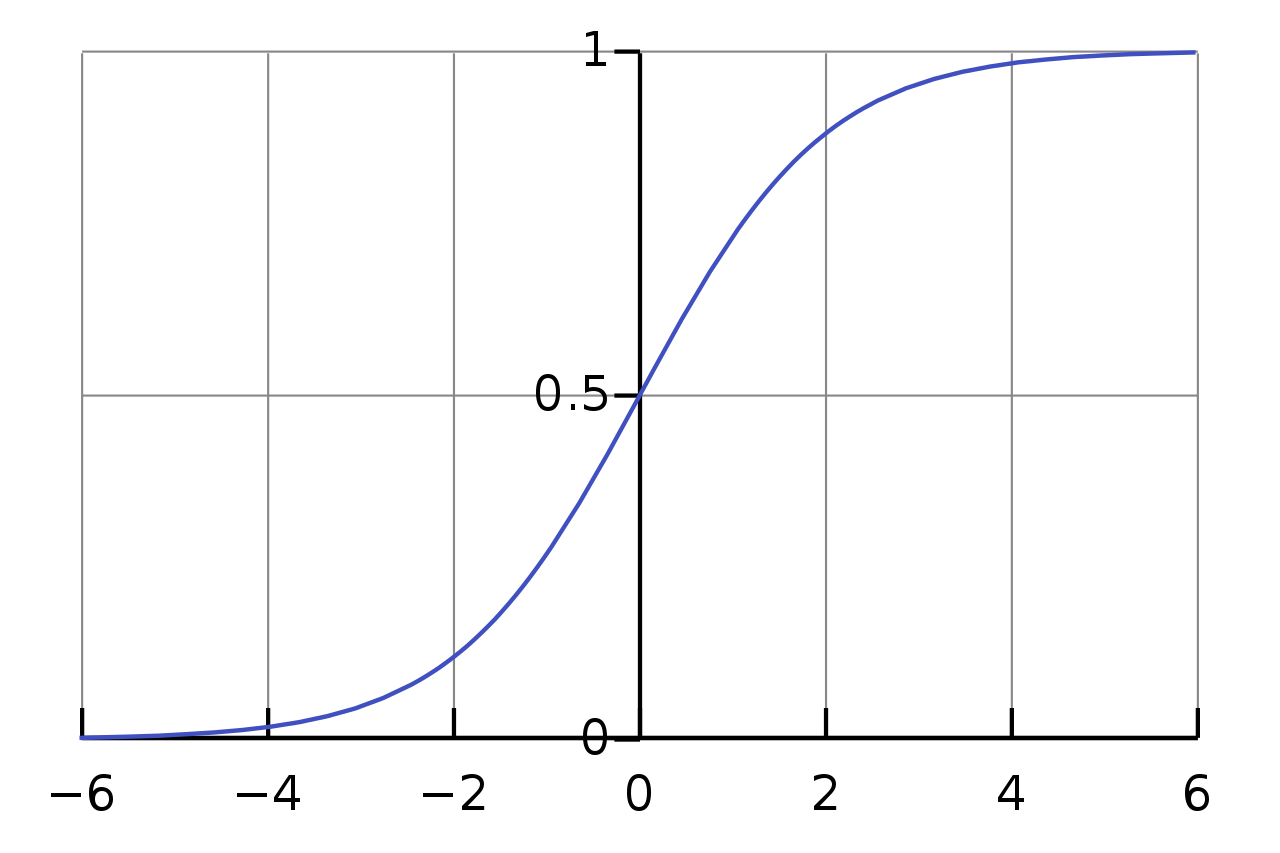 -->
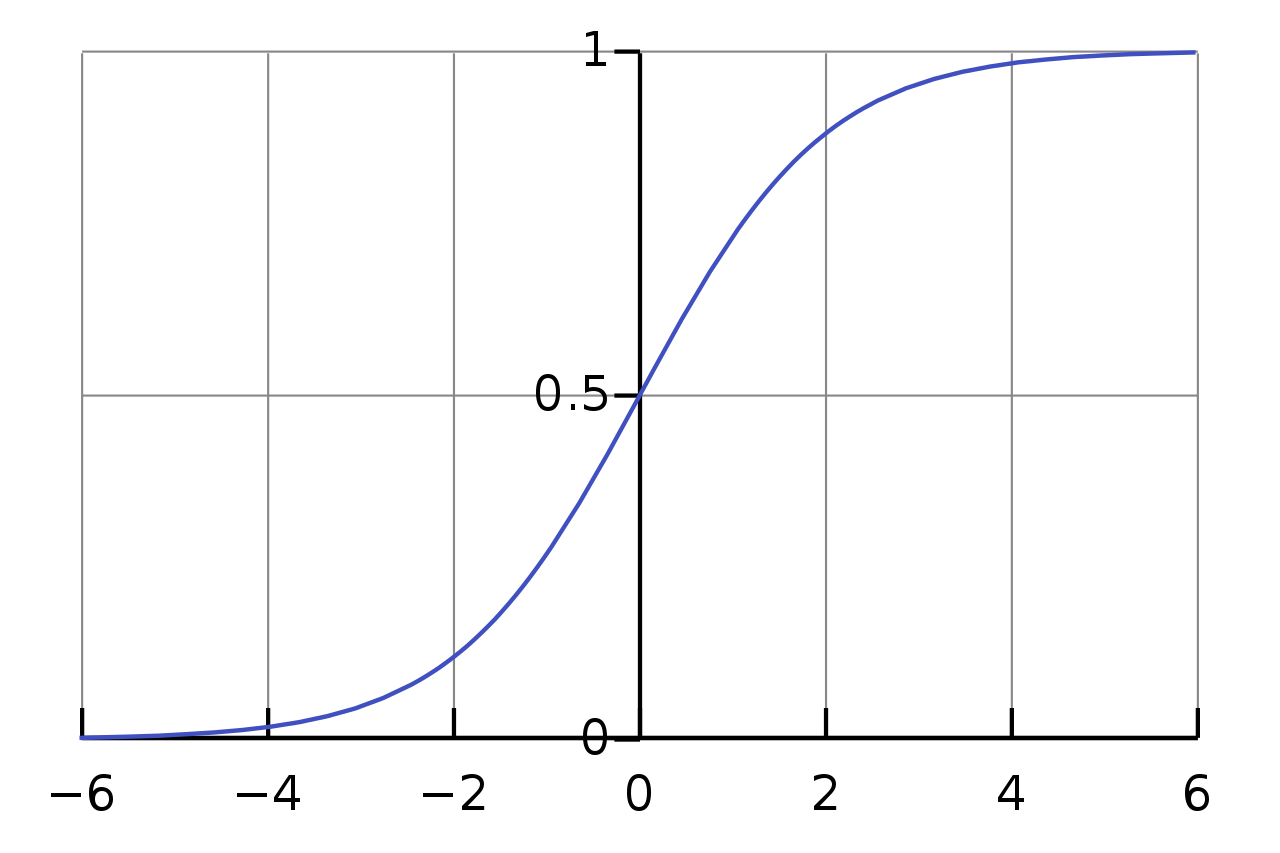

<center><b>Figure 1. The logistic function.</b> Source: <a href=\"https://commons.wikimedia.org/wiki/File:Logistic-curve.svg\">Wikipedia</a></center>


When applied to the $Y = {\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}{\beta}_{j}$ from linear regression we get the following formulation for logistic regression:
$$\frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}{\beta}_{j}}}$$

The net effect is that the the typical linear regression output values ranging from $-\inf$ and $+\inf$ are now bound to $(0,1)$, which is typical for probabilities. That is, the above formulation can be interpreted as estimating the probability of instance $X$ (described by all predictors $X_j$) belonging to class 1. 

$$ P( Y=1 | X ) = \frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}}}$$

The probability of class 0 is then:

$$ P( Y=0 | X ) = 1 - P( Y=1 | X ) $$

Values close to 0 are deemed to belong to class 0 and values close to 1 are deemed to belong to class 1, thus resulting in a categorical output which is what we intend in logistic regression.

<!-- NOTE: This is great but I think too intense at this point. The problem is that we haven't done the background in probability it seems to require. -->

<!-- # Supervised Training for Logistic Regression

In order to apply logistic regression to a particular problem, e.g., email spam classification, we need to train a logistic regression model using a supervised method, i.e., we need a training dataset consisting of expert-labeled instances of the objects we want to classify and their correct categories as judged by human experts.

During training, the best set of predictor variable weights or coefficients $\beta_{j}$ are estimated based on the training data. It is beyond the scope of this notebook to detail the details of the training process. We will just note that the objective is to find the weights that maximize how well the predicted categories match the true, actual/expert-labelled categories for all instances.

Mathematically, the goal of the training is to maximize the following expression that captures how well a set of the values of the coefficients $\beta_{j}$, i.e., a logistic model, predicts the actual classes for all training instances T:

$$Likelihood(T) = \prod _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})$$

The expression is called the likelihood of the training data $T$ and is defined as the product of the estimated probabilities of each training example $X_j$ given a model defined by the weights/coefficients $\beta_{j}$. For computational reasons (e.g., it is easier to work with sum of small numbers than with products of such small numbers, i.e., probabilities values between 0 and 1), we maximize the log of likelihood:

$$Log-Likelihood(T) = log (\prod _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})) = \sum _{j=1} ^{T} P(Y_{j}|X_{j}; \beta_{j})$$

The probability of an instance labeled with class $Y_i$ is in compact form: 

$$ P(Y_{j}|X_{j}; \beta_{j}) = P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j} (1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}$$

Based on this expression of the probability of each instance, we can rewrite the log-likelihood as:

$$Log-Likelihood(T) = \sum _{j=1} ^{T} {P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j}} + \sum _{j=1} ^{T} {(1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}}$$

During training this expression is maximized. It can be maximized by minimizing its opposite which we can call the cost function or optimization objective for logistic regression:

$$cost-function = - Log-Likelihood(T) = - \sum _{j=1} ^{T} {P(Y_{j}=1|X_{j}; \beta_{j})^{Y_j}} - \sum _{j=1} ^{T} {(1- P(Y_{j}=1|X_{j}; \beta_{j})^{(1-Y_j)}}$$

Finding the weights or coefficients $beta_{j}$ that minimize the cost function can be done using various algorithms such as gradient descent. -->

# Interpreting the Coefficients in Logistic Regression

One of the best ways to interpret the coefficients in logistic regression is to transform it back into a linear regression whose coefficients are easier to interpret. 
From the earlier formulation, we know that:

$$ Y =  P( Y=1 | X ) = \frac{1}{1 + e^{{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}{\beta}_{j}}}$$

Applying a log function on both sides, we get:

$$ log \frac{P ( Y=1 | X )}{1- P( Y=1 | X )} = \sum \limits _{j=1} ^{p}  X_{j}{\beta}_{j} $$

On the left-hand of the above expression we have the log odds defined as the ratio of the probability of class 1 versus the probability of class 0. Indeed, this expression $\frac{P ( Y=1 | X )}{1- P( Y=1 | X )}$ is the odds because $1- P( Y=1 | X )$ is the probability of class 0, i.e., $P( Y=0 | X )$.

Therefore, we conclude that the log odds are a linear regression of the predictor variables weighted by the coefficients $\beta_{j}$. Each such coefficient therefore indicates a change in the log odds when the corresponding predictor changes with a unit (in the case of numerical predictors).

You may feel more comfortable with probabilities than odds, but you have probably seen odds expressed frequently in the context of sports.
Here are some examples:

- 1 to 1 means 50% probability of winning
- 2 to 1 means 67% probability of winning
- 3 to 1 means 75% probability of winning
- 4 to 1 means 80% probability of winning

Odds are just the probability of success divided by the probability of failure.
For example 75% probability of winning means 25% probability of losing, and $.75/.25=3$, and we say the odds are 3 to 1.

Because log odds are not intuitive (for most people), it is common to interpret the coefficients of logistic regression as odds.
When a log odds coefficient has been converted to odds (using $e^\beta$), a coefficient of 1.5 means the positive class is 1.5 times more likely given a unit increase in the variable.

# Peformance Evaluation 

Performance evaluation for logistic regression is  the same as for other classification methods.
The typical performance metrics for classifiers are accuracy, precision, and recall (also called sensitivity). 
We previously talked about these, but we did not focus much on precision, so let's clarify that.

In some of our previous classification examples, there are only two classes that are equally likely (each is 50% of the data).
When classes are equally likely, we say they are **balanced**.
If our classifier is correct 60% of the time with two balanced classes, we know it is 10% better than chance.

However, sometimes things are very unbalanced.
Suppose we're trying to detect a rare disease that occurs once in 10,000 people.
In this case, a classifier that always predicts "no disease" will be correct 99.99% of the time.
This is because the **true negatives** in the data are so much greater than the **true positives**
Because the metrics of accuracy and specificity use true negatives, they can be somewhat misleading when classes are imbalanced.

In contrast, precision and recall don't use true negatives at all (see the figure below).
This makes them behave more consistently in both balanced and imbalance data.
For these reasons, precision, recall, and their combination F1 (also called f-measure) are very popular in machine learning and data science.

<!-- 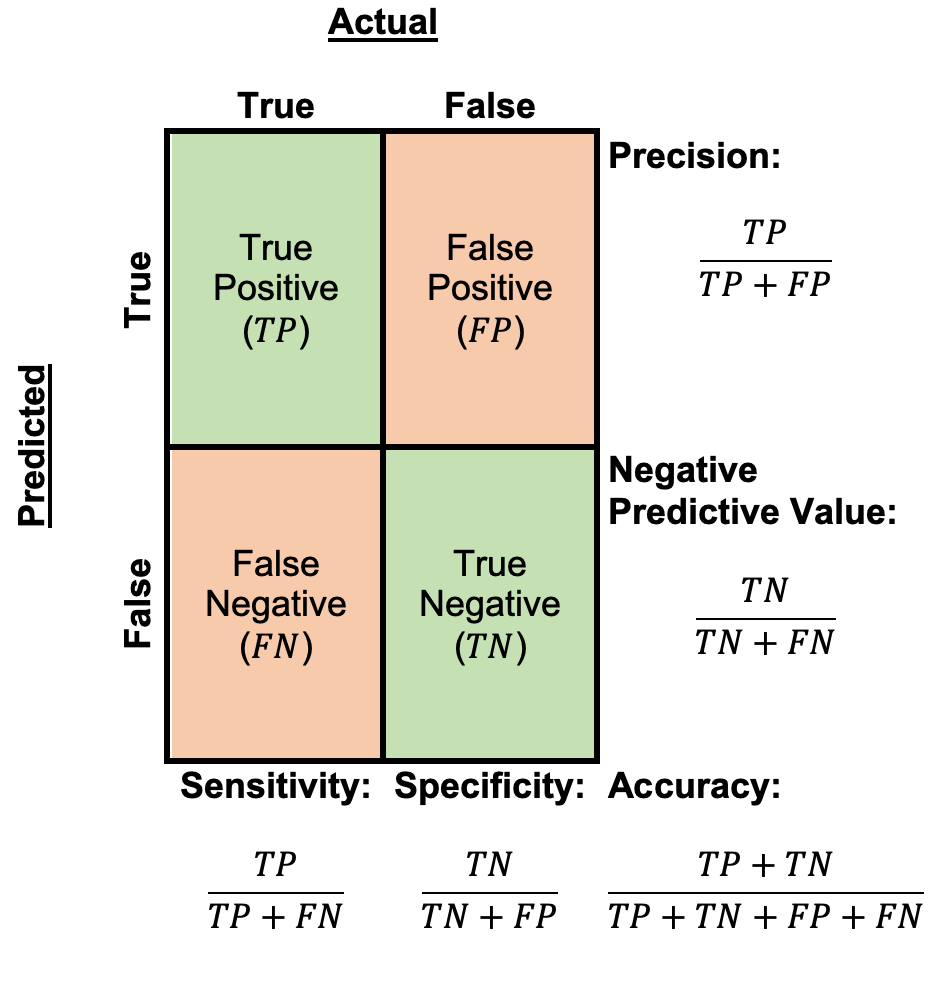 -->
<div>
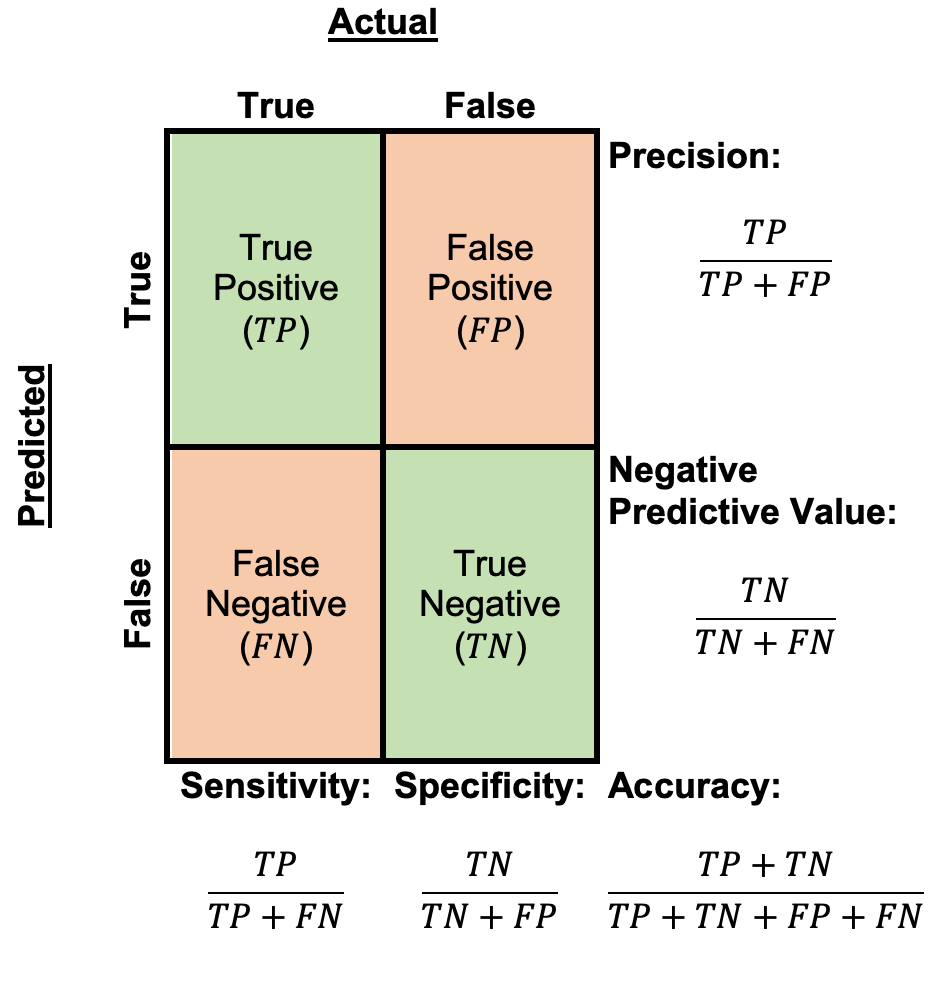
</div>

<center><b>Figure 2. A confusion matrix. Note recall is an alternate label for sensitivity. </b> </center>

<!-- NOTE: this became redundant with Tasha's KNN classification notebook. I modified to amplify precision, which she did not focus much on. -->
<!-- happens, it is easy

These are typical derived by compared the predicted output to the golden or actual output/categories in the expert labelled dataset.

For a binary classification case, we denote the category 1 as the positive category and category 0 as the negative category. Using this new terminology, When comparing the predicted categories to the actual categories we may end up with the following cases:
* True Positives (TP): instances predicted as belonging to the positive category and which in fact do belong to the positive category
* True Negatives (TN): instances predicted as belonging to the negative category and which in fact do belong to the negative category
* False Positives (FP): instances predicted as belonging to the positive category and which in fact do belong to the negative category
* False Negatives (FN): instances predicted as belonging to the negative category and which in fact do belong to the positive category

From these categories, we define the following metrics:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

$Precision = \frac{TP}{TP + FP}$

$Recall = \frac{TP}{TP + FN}$

Classfication methods that have a high accuracy are preferred in general although  -->
In some cases, maximizing precision or recall may be preferred. 
For instance, a high recall is highly recommended when making medical diagnosis since it is preferrable to err on mis-diagnosing someone as having cancer as opposed to missing someone who indeed has cancer, i.e., the method should try not to miss anyone who may indeed have cancer. 
This idea is sometimes referred to as **cost-sensitive classification**, because there may be an asymmetric cost toward making one kind of mistake vs. another (i.e. FN vs. FP).

In general, there is a trade-off between precision and recall. 
If precision is high then recall is low and vice versa. 
Total recall (100% recall) is achievable by always predicting the positive class, i.e., label all instances as positive, in which case precision will be very low.

In the case of logistic regression, you can imagine that we changed the threshold from .50 to a higher value like .90.
This would make many observations previously classified as 1 now classified as 0.
What was left of 1 would be very likely to be 1, since we are 90% confident (high precision).
However, we would have lost all of the 1s between 50-90% (low recall).

<!-- TODO: we need to normalize coverage of performance metrics across notebooks, particularly for classification -->

# Example: Diabetes or no Diabetes

The type of dataset and problem is a classic supervised binary classification. 
Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.


## The Pima Indians Dataset

The Pima are a group of Native Americans living in Arizona. 
A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. 
In recent years, because of a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, made them develop the highest prevalence of type 2 diabetes, and for this reason they have been subject of many studies.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
The dataset includes data from 768 women with 8 characteristics, in particular:

| Variable | Type  | Description                                                              |
|----------|-------|:--------------------------------------------------------------------------|
| pregnant | Ratio | Number of times pregnant                                                 |
| glucose  | Ratio | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| bp       | Ratio | Diastolic blood pressure (mm Hg)                                         |
| skin     | Ratio | Triceps skin fold thickness (mm)                                         |
| insulin  | Ratio | 2-Hour serum insulin (mu U/ml)                                           |
| bmi      | Ratio | Body mass index (weight in kg/(height in m)^2)                           |
| pedigree | Ratio | Diabetes pedigree function                                               |
| age      | Ratio | Age (years)                                                              |
| label    | Ratio | Diagnosed with diabetes (0 or 1)                                                  |

**Source:** This dataset was taken from the UCI Machine Learning Repository library.

<!-- NOTE: UCI is no longer providing access to the dataset, but without explanation regarding its continued use. Quick searches on Google also do not provide an explanation. TODO: determine if use of the Pima has been disallowed, and if so, replace it in this notebook with another dataset -->

## The problem

 The type of dataset and problem is a classic supervised binary classification. 
 Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

 To solve the problem we will have to analyze the data, do any required transformation and normalization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

<!---
AO: In the code below, I removed the np and os imports; they did not seem strictly necessary for this problem
-->

## Get the data

- First import `pandas` as `pd` so we can read the data file into a dataframe

<!---
AO: Since this is just openning a file, several options:

- Use full path for file in read command (Current choice)
- Assemble path from separate strings
- Store part of path in variable, then assemble

I also added an explanation for why we are defining the col names

Had to switch kernel to xpython here b/c Python 3 was not giving intellisense for pd
-->
Because our data file doesn't have a header (i.e., column names), we need to define these:

- Set  `col_names` to to a list containing: `"pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"`
- Set `dataframe` to with `pd` do `read_csv` using 
    - `"datasets/pima-indians-diabetes.csv"`
    - freestyle `header=None`
    - freestyle `names=col_names`
- `dataframe` (to display)

<!-- TODO: I'm not sure if it makes sense to have data cleaning steps here; especially since we have an entire notebook on that -->

## Clean the data

As you noticed when displaying the dataframe, something is wrong.
Often the first row of a data file will be a **header** row that gives the names of the columns.
In comma separated value (csv) format, the header and each following row of data are divided into columns using commas.
However, in this case, something different is going on.

Let's take a closer look at the first 20 rows:

- with `dataframe` do `head` using
    - `20`

As you can see, the first 9 rows (rows 0 to 8) are what we might expect in column headers. 
Since we manually specified the column names when we loaded the dataframe, these rows are "junk", and we should get rid of them.
One way to do that is to get a sublist of rows from dataset that excludes them:

- Set `dataframe` to `in list dataframe get sublist from #10 to last`
- `dataframe`

While the dataframe may look OK now, there is a subtle problem.
When `pandas` reads data from a file, it uses what it finds in the column to decide what kind of variable that column is.
Since the first column originally had some header information in it, `pandas` doesn't think it is numeric.
So we need to tell `pandas` to correct it:

- `import numpy as np`

Convert everything in the dataframe to numeric:

- Set `dataframe` to with `dataframe` do `astype` using 
    - from `np` get `float32`

## Explore the data

### Descriptive statistics

- with `dataframe` do `describe`

There are some zeros which are really problematic.
Having a glucose or blood pressure of 0 is not possible for a living person.
Therefore we assume that variables with zero values in all variables except `pregnant` and `label` are actually **missing data**.
That means, for example, that a piece of equipment broke during blood pressure measurement, so there was no value.

- Set `dataframe2` to with `dataframe` do `drop` using
    - freestyle `columns=["pregnant","label"]`

<!-- TODO: similarly question whether missing data should be part of this. Something to check on in future versions -->

Now replace all the zeros in the remaining columns with the median in those columns:

- with `dataframe2` do `replace` using
    - `0`
    - with `dataframe2` do `median`
    - freestyle `inplace=True`

Add the two missing columns back in:

- Set `dataframe` to with `dataframe2` do `assign` using
    - freestyle `pregnant = dataframe["pregnant"]`
    - freestyle `label = dataframe["label"]`
- `dataframe` (to display)

### Correlations

One of the most basic ways of exploring the data is to look at correlations.
As we previously discussed, correlations show you how a variable is related to another variable.
When the correlation is further away from zero, the variables are more strongly related:

- Set `corr` to with `dataframe` do `corr`
- `corr`

This is a correlation matrix.
The diagonal is 1.0 because each variable is perfectly correlated with itself.
You might also notice that the upper and lower triangular matrices (above/below the diagonal) are mirror images of each other.

Sometimes its easier to interpret a correlation matrix if we plot it in color with a heatmap.

First, the import `plotly` for plotting:

- `import plotly.express as px`

To display the correlation matrix as a heatmap:

- with `px` do `imshow` using
    - `corr`
    - A freestyle block **with a notch on the right** containing `x=`, connected to `from corr get columns`
    - A freestyle block **with a notch on the right** containing `y=`, connected to `from corr get columns`

This is the color that represents zero: 

So anything darker is a negative correlation, and anything lighter is a positive one.
As you can see, most of the negative correlations are weak and so not very interesting. 
The most positive correlations are pink-orange at around .55, which is a medium correlation.

### Histograms

Another way to try to understand the data is to create histograms of all the variables.
As we briefly discussed, a histogram shows you the count (on the y-axis) of the number of data points that fall into a certain range (also called a bin) of the variable.

It can be very tedious to make a separate plot for each variable when you have many variables.
The best way is to do it in a loop:

- `for each item i in list` from `dataframe` get `columns` (use the green loop)
    - Set `fig` to with `px` do `histogram` using
        - `dataframe`
        - `x=` followed by `i`  **Hint**:  
    - freestyle `fig.show()` 

Often we omit `with fig do show` because Jupyter always displays the last "thing" in a cell.
In this case, however, we want to display multiple things using one cell, so we need to explicitly display each one.

From these histograms we observe:
    
- Only `glucose`, `bp`, and `bmi` are normal
- Everything else has larger mass on the lower end of the scale (i.e. on the left)

## Prepare train/test sets

We need to split the dataframe into training data and testing data, and also separate the predictors from the class labels.

Let's start by dropping the label:

- Set `X` to `with dataframe do drop using` a list containing
    - freestyle `columns=["label"]`
- `X` (to display)

Save a dataframe with just `label` in `Y`:

- Set `Y` to `dataframe [ ] ` containing the following in a list
    - `"label"`
- `Y` (to display)

To split our `X` and `Y` into train and test sets, we need an import:

- `import sklearn.model_selection as model_selection`

Now do the splits:

- Create variable `splits`
- Set it to `with model_selection do train_test_split using` a list containing
    - `X` (the features in an array)
    - `Y` (the labels in an array)
    - freestyle `test_size=0.2` (the proportion of the dataset to include in the test split)

## Logistic regression model

We need libraries for:

- Logistic regression
- Performance metrics
- Ravel

As well as libraries we need to standardize:

- Scale
- Pipeline

So do the following imports:

- `import sklearn.linear_model as linear_model`
- `import sklearn.metrics as metrics`
- ~~`import numpy as np`~~ (already imported above)
- `import sklearn.preprocessing as pp`
- `import sklearn.pipeline as pipe`

We're going to make a pipeline so we can scale and train in one step:

- Set `std_clf` to with `pipe` do `make_pipeline` using
    - with `pp` create `StandardScaler` 
    - with `linear_model` create `LogisticRegression`

We can treat the whole pipeline as a classifier and call `fit` on it:

-  with `std_clf` do `fit` using
    - `in list splits get # 1` (this is Xtrain)
    - with `np` do `ravel` using
        - `in list splits get # 3` (this is Ytrain)

Now we can get predictions from the model for our test data:

- Set `predictions` to with `std_clf` do `predict` using
    - `in list splits get # 2` (this is Xtest)
- `predictions` (to display)


## Assessing the model

To get the accuracy:

- `print` `create text with`
    - "Accuracy:"
    - with `metrics` do `accuracy_score` using
        - `in list splits get # 4`  (this is `Ytest`)
        - `predictions`

To get precision, recall, and F1:

- `print` with `metrics` do `classification_report` using
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`

Notice how the recall is much lower for `1` (diabetes), the rare class.

Finally, let's create an ROC plot. 
To create the plot, we need predicted probabilities (for class `1`) as well as the ROC metrics using these probabilities and the true class labels:

- Set `probs` to with `std_clf` do `predict_proba` using
    - `in list splits get # 2` (this is Xtest)
- Set `rocMetrics` to with `metrics` do `roc_curve` using
    - `in list splits get # 4` (this is Ytest)
    - freestyle `probs[:,1]` (this is the positive class probabilities)
- Set `fig` to with `px` do `line` using
    - freestyle `x=rocMetrics[0]`
    - freestyle `y=rocMetrics[1]`
- with `fig` do `update_yaxes` using
    - freestyle `title_text="Recall/True positive rate"`
- with `fig` do `update_xaxes` using
    - freestyle `title_text="False positive rate"`
    
<!-- NOTE: Vasile had a nice AUC annotation on the plot, but I ran out of time to reverse engineer that -->

## Check your knowledge

**Hover to see the correct answer.**

1.  What is the primary use of logistic regression, especially binary logistic regression?
- Predicting continuous numerical values
- Dimensionality reduction
- <div title="Correct answer">Classification, particularly binary classification</div>
- Clustering

2.  How does logistic regression convert its predicted numeric probability into a classification?
- By rounding to the nearest integer.
- <div title="Correct answer">By comparing the probability to a threshold (e.g., 0.50).</div>
- By taking the logarithm of the probability.
- By multiplying the probability by a coefficient.

3.  Which of the following is NOT a common type of logistic regression?
- Binary/binomial logistic regression
- Multiclass/Multinomial logistic regression
- Ordinal logistic regression
- <div title="Correct answer">Hard classification logistic regression</div>

4.  When is logistic regression most suitable for use?
- When you need a classifier and interpretability is not important.
- When the relationships between variables are highly non-linear.
- <div title="Correct answer">When you need a classifier and want to easily interpret predictor variables.</div>
- When dealing with a very large number of classes in multinomial classification.

5.  In the mathematical formulation of linear regression, what does $Y$ represent?
- The sum of predictor variables.
- The weights (coefficients) of the predictors.
- <div title="Correct answer">The output variable (dependent variable).</div>
- The number of predictor variables.

6.  What is the purpose of applying the sigmoid (or logistic) function in logistic regression?
- To increase the range of output values.
- To make the output values negative.
- <div title="Correct answer">To transform continuous linear regression output values to a range between 0 and 1 (probabilities).</div>
- To convert the output into an integer.

7.  The expression $P(Y=1|X) = \frac{1}{1 + e^{\beta_0 + \sum_{j=1}^{p} X_j \beta_j}}$ in logistic regression estimates what?
- The probability of an instance belonging to class 0.
- The linear combination of predictors.
- <div title="Correct answer">The probability of an instance belonging to class 1.</div>
- The log-odds of the outcome.

8.  How can the coefficients in logistic regression be interpreted more intuitively?
- As direct changes in the probability of the positive class.
- By ignoring them and focusing on accuracy.
- <div title="Correct answer">By transforming them into odds using $e^\beta$.</div>
- As the direct value of the dependent variable.

9.  What does a logistic regression coefficient of 1.5 (when converted to odds using $e^\beta$) mean for the positive class given a unit increase in the variable?
- The positive class is 1.5 times *less* likely.
- The probability of the positive class increases by 1.5.
- The positive class is 0.5 times more likely.
- <div title="Correct answer">The positive class is 1.5 times *more* likely.</div>

10. When are precision and recall particularly useful performance metrics compared to accuracy and specificity?
- When classes are balanced.
- When the dataset is small.
- <div title="Correct answer">When classes are imbalanced.</div>
- When only true negatives are important.

11. What is the definition of "odds" in the context of probability?
- The probability of failure divided by the probability of success.
- The sum of the probability of success and the probability of failure.
- <div title="Correct answer">The probability of success divided by the probability of failure.</div>
- The logarithm of the probability of success.

12. In the given Pima Indians Diabetes dataset, what is the 'label' variable?
- Age of the individual.
- Body mass index.
- Plasma glucose concentration.
- <div title="Correct answer">Diagnosed with diabetes (0 or 1).</div>

13. Why were zero values in columns like 'glucose' and 'bp' problematic in the Pima Indians Diabetes dataset?
- They were not problematic and represented valid measurements.
- They indicated that the person was deceased.
- <div title="Correct answer">They represented missing data, as a living person cannot have a glucose or blood pressure of 0.</div>
- They were outliers that should have been removed.

14. What was done to address the problematic zero values in the Pima Indians Diabetes dataset (for columns other than 'pregnant' and 'label')?
- The rows with zero values were deleted.
- The zero values were converted to a very small non-zero number.
- <div title="Correct answer">They were replaced with the median of their respective columns.</div>
- They were replaced with the mean of their respective columns.

15. What does a correlation matrix visually represent in the heatmap generated by `px.imshow`?
- The distribution of individual variables.
- The number of missing values in each column.
- <div title="Correct answer">How strongly two variables are related to each other.</div>
- The predicted classification labels.

16. Why is it important to use `fig.show()` explicitly within the loop when generating multiple histograms in a single cell?
- To prevent the plots from overlapping.
- To save each plot as a separate image file.
- Jupyter only displays the last "thing" in a cell by default, and `fig.show()` ensures each plot is displayed.
- <div title="Correct answer">Jupyter only displays the last "thing" in a cell by default, and `fig.show()` ensures each plot is displayed.</div>

17. What is the purpose of `sklearn.model_selection.train_test_split`?
- To combine the features and labels into a single dataset.
- To normalize the data before training.
- <div title="Correct answer">To divide the dataset into training and testing subsets for features (X) and labels (Y).</div>
- To evaluate the performance of the model.

18. In the logistic regression pipeline, what is the role of `StandardScaler`?
- To convert categorical variables into numerical ones.
- To reduce the dimensionality of the data.
- To fit the logistic regression model.
- <div title="Correct answer">To standardize features by removing the mean and scaling to unit variance.</div>

19. When assessing the logistic regression model, what does the `classification_report` provide?
- Only the overall accuracy of the model.
- The coefficients of the logistic regression model.
- <div title="Correct answer">Precision, recall, and F1-score for each class, along with support and overall averages.</div>
- The raw predicted probabilities for each instance.

20. What is represented on the x-axis of the ROC (Receiver Operating Characteristic) plot?
- Recall/True positive rate
- Precision
- F1-score
- <div title="Correct answer">False positive rate</div>

<!--  -->